In [185]:
import pandas as pd
import numpy as np
from hazem_doc2vec.helper_functions import in_pickle, out_pickle
import data_analysis.preprocessor_end as pre
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import random
import matplotlib.pyplot as plt
import seaborn as sn
import os
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


In [186]:
def precision(tp, fp): return tp / (tp + fp)
def recall(tp, fn): return tp / (tp + fn)
def f1_score(precision, recall): return 2 * ((precision * recall) / (precision + recall))
def accuracy(tp, fp, tn, fn): return (tp + tn) / (tp + fp + fn + tn)

In [162]:
%%time
# Loading the saved doc2vec model
model = Doc2Vec.load('d2v.model')

CPU times: user 1.25 s, sys: 75.5 ms, total: 1.33 s
Wall time: 1.33 s


In [157]:
%%time
books = in_pickle('data/list_of_words_labels_books')
random.shuffle(books)

books_vectors = np.empty([len(books), 300])
books_labels = np.empty(len(books), dtype=np.int)
for i in range(len(books)):
    books_vectors[i] = model.infer_vector(books[i][0])
    books_labels[i] = books[i][1]

out_pickle('data/books_vectors', books_vectors)
out_pickle('data/books_labels', books_labels)

CPU times: user 36.4 s, sys: 199 ms, total: 36.6 s
Wall time: 36.6 s


In [163]:
%%time
books_vectors = in_pickle('data/books_vectors')
books_labels = in_pickle('data/books_labels')

clf = in_pickle('data/svm_2')        # load the SVM trained on movies

y_pred_books = clf.predict(books_vectors)

cm = confusion_matrix(books_labels, y_pred_books)
tn, fp, fn, tp = cm.ravel()
precision = precision(tp, fp)
recall = recall(tp, fn)
f1_score = f1_score(precision, recall)
accuracy = accuracy(tp, fp, tn, fn)
print(cm)


[[ 12 158]
 [ 87   7]]
CPU times: user 322 ms, sys: 3.61 ms, total: 325 ms
Wall time: 324 ms


In [164]:
(tn, fp, fn, tp)    

(12, 158, 87, 7)

In [165]:
(precision, recall, f1_score, accuracy)

(0.04242424242424243,
 0.07446808510638298,
 0.05405405405405406,
 0.07196969696969698)

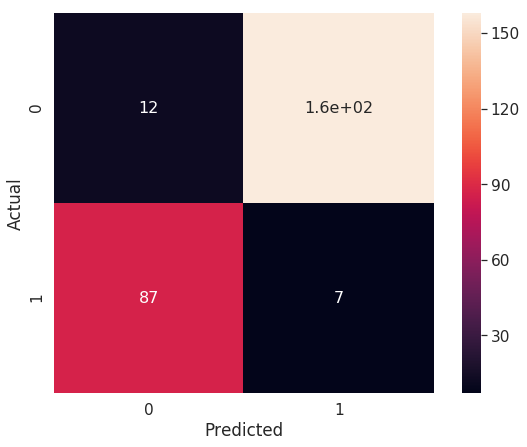

In [166]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})# font size
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.imshow(df_cm)
plt.savefig('books_test_svm_2.png')

In [167]:
books = in_pickle('data/list_of_words_labels_books')
len(books)

264

In [168]:
doc = [books_vectors[1], books_vectors[-1], books_vectors[3]]
lab = [books_labels[1], books_labels[-1], books_labels[3]]
(lab, clf.predict(doc), clf.predict_proba(doc))

([0, 0, 0], array([0, 1, 1]), array([[0.7839134 , 0.2160866 ],
        [0.31829129, 0.68170871],
        [0.17222768, 0.82777232]]))

In [188]:
(tn, fp, fn, tp)    

(161, 9, 93, 1)

In [187]:
%%time
books_vectors = in_pickle('data/books_vectors')
books_labels = in_pickle('data/books_labels')

clf = in_pickle('data/svm_1')        # load the SVM trained on movies

y_pred_books = clf.predict(books_vectors)

cm = confusion_matrix(books_labels, y_pred_books)
tn, fp, fn, tp = cm.ravel()
precision = precision(tp, fp)
recall = recall(tp, fn)
f1_score = f1_score(precision, recall)
accuracy = accuracy(tp, fp, tn, fn)
print(cm)

[[161   9]
 [ 93   1]]
CPU times: user 706 ms, sys: 3.81 ms, total: 710 ms
Wall time: 710 ms


In [188]:
(tn, fp, fn, tp)    

(161, 9, 93, 1)

In [189]:
(precision, recall, f1_score, accuracy)

(0.1, 0.010638297872340425, 0.01923076923076923, 0.6136363636363636)

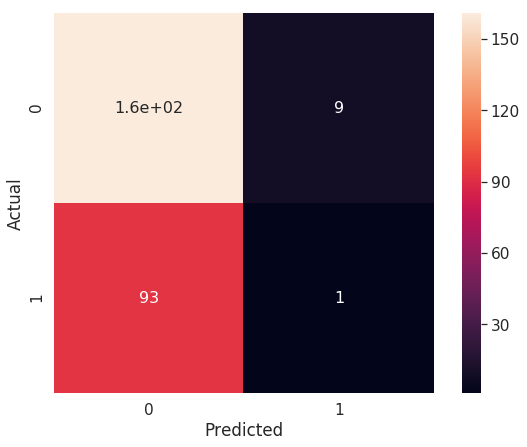

In [190]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})# font size
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.imshow(df_cm)
plt.savefig('books_test_svm_1.png')